In [ ]:
from keras import *
from PIL import Image
from keras.models import *
from keras.layers import Input, Dense
# from keras.preprocessing import image
import keras.utils as image
from keras.applications.inception_resnet_v2 import preprocess_input, decode_predictions
#from keras.applications.inception_v3 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
#from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical
import glob
import os.path
from keras.models import load_model
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.listdir('/content/drive/MyDrive/datasetdata/')

['Melanoma Skin Cancer Nevi and Moles',
 'Eczema Photos',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
 'Psoriasis pictures Lichen Planus and related diseases',
 'Acne and Rosacea Photos']

In [ ]:
categorie = ['Acne and Rosacea Photos',
 'Eczema Photos',
 'Melanoma Skin Cancer Nevi and Moles',
 'Psoriasis pictures Lichen Planus and related diseases',
 'Tinea Ringworm Candidiasis and other Fungal Infections']

In [ ]:
def load_data(path):
    x_train = []
    y_train = []

    images = glob.glob(path+"/**/*")
    for photo in images:
        img = image.load_img(photo, target_size=(128, 128))
        tr_x = image.img_to_array(img)
        tr_x = preprocess_input(tr_x)
        label = (photo.split("/"))[-2]
        label_place = categorie.index(label)

        x_train.append(tr_x)
        y_train.append(label_place)

    return np.array(x_train), to_categorical(y_train)

# Loading  DATASET

In [ ]:
X, Y = load_data("/content/drive/MyDrive/datasetdata")

In [ ]:
X_train, Y_train = load_data("/content/drive/MyDrive/dataset2/train")

In [ ]:
X_test, Y_test = load_data("/content/drive/MyDrive/dataset2/test")

In [ ]:
print(type(Y_train))
print(Y_train.shape)    #  808,4
print(X_train.shape)    #  808,299,299,3
print(X.shape)
print(Y.shape)

<class 'numpy.ndarray'>
(1763, 5)
(1763, 128, 128, 3)
(5242, 128, 128, 3)
(5242, 5)


In [ ]:

print(Y_test.shape)    # 808,4
print(X_test.shape)    # 808,299,299,3


(441, 5)
(441, 128, 128, 3)


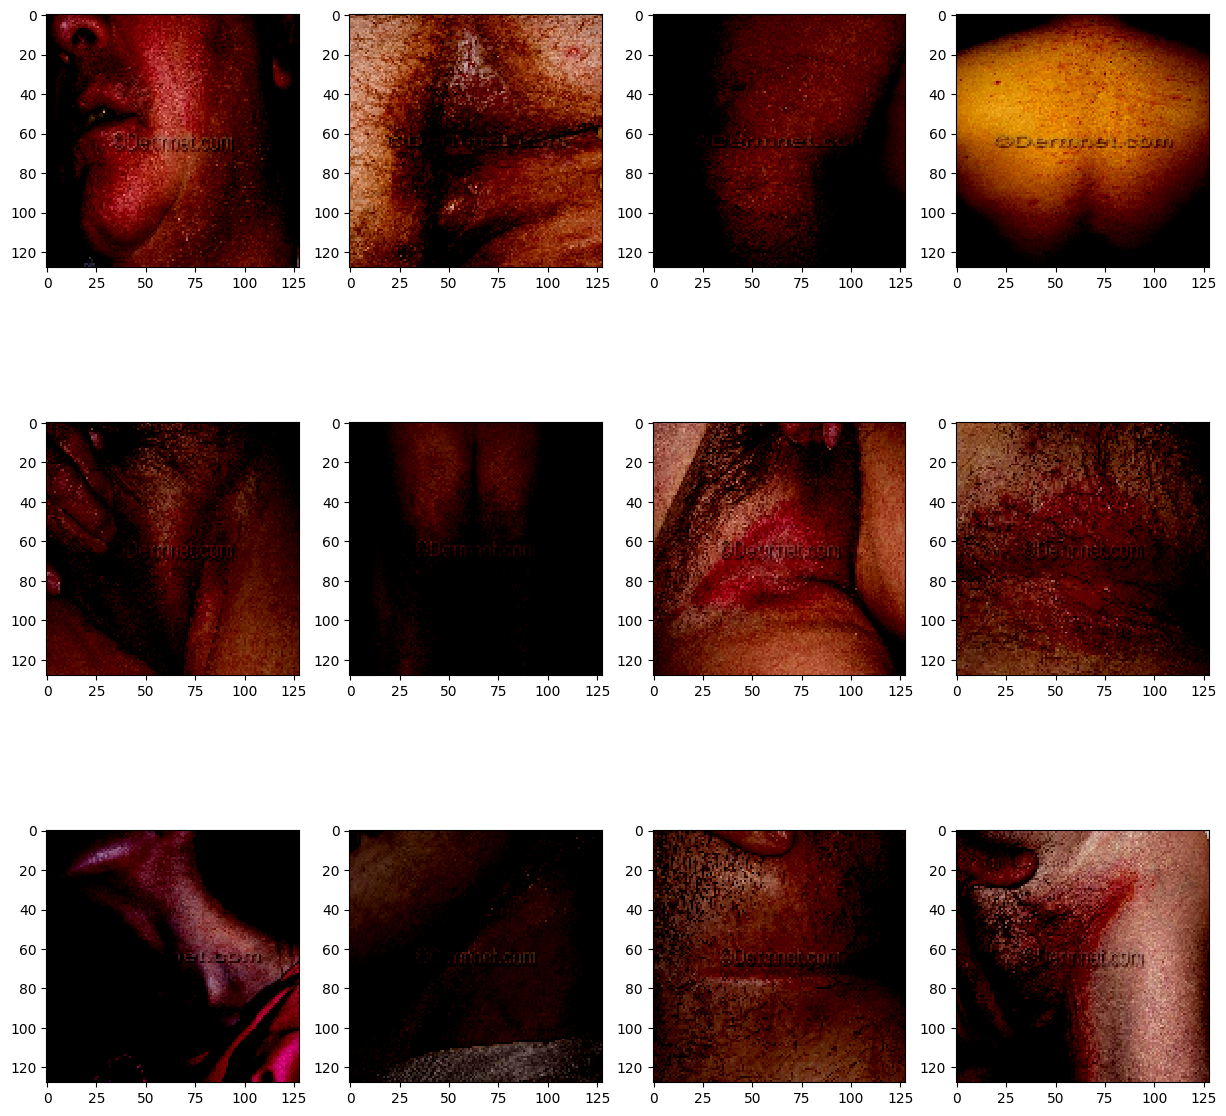

In [ ]:
# Display Some Images
w=60
h=40
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    # ax.title.set_text(Y_train[i])
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

In [ ]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

img_size = 128

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.fit(X_train,Y_train, batch_size=32, epochs=50, validation_data=(X_test, Y_test))




In [ ]:
from keras.preprocessing.image import ImageDataGenerator
# Data Generator

BATCH_SIZE = 64

train_generator = ImageDataGenerator(
        rotation_range = 45 ,
        horizontal_flip=True,
    )

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
from keras.callbacks import ModelCheckpoint

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath='custom_best_model.h5',
                             monitor='val_loss',
                             save_best_only=True,
                             mode='min',
                             verbose=1)

# Train the model with the ModelCheckpoint callback
history = model.fit(X_train, Y_train,
                    batch_size=2, #128
                    epochs=2, #100
                    shuffle=True,
                    validation_data=(X_test, Y_test),
                    callbacks=[checkpoint],
                    verbose=1)


Epoch 1/2
882/882 [==============================] - ETA: 0s - loss: 0.6158 - accuracy: 0.7567
Epoch 1: val_loss improved from inf to 0.46526, saving model to custom_best_model.h5
882/882 [==============================] - 162s 182ms/step - loss: 0.6158 - accuracy: 0.7567 - val_loss: 0.4653 - val_accuracy: 0.8254
Epoch 2/2


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


882/882 [==============================] - ETA: 0s - loss: 0.5102 - accuracy: 0.7947
Epoch 2: val_loss did not improve from 0.46526
882/882 [==============================] - 152s 172ms/step - loss: 0.5102 - accuracy: 0.7947 - val_loss: 0.4812 - val_accuracy: 0.7596


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)

# Print the test accuracy
print('Test accuracy:', test_acc)


Test accuracy: 0.759637176990509


In [ ]:
loaded_model = load_model('/content/custom_best_model.h5')

# Accuracy with test data

In [ ]:
y_pred=loaded_model.predict(X_test)
y_pred = (y_pred > 0.45)
score=accuracy_score(y_pred,Y_test)
print(score*100 ,' % Accuracy')

14/14 [==============================] - 4s 241ms/step
73.01587301587301  % Accuracy


# Accuracy

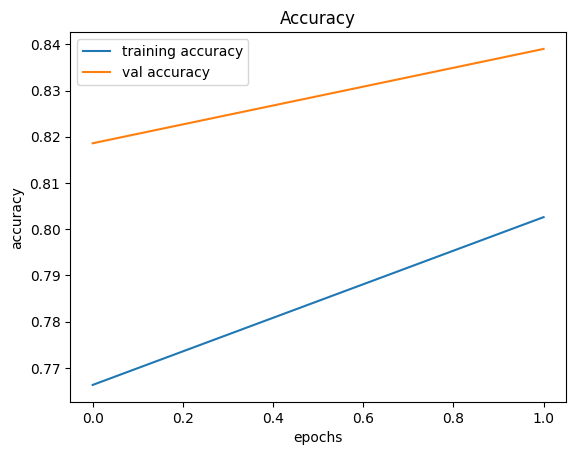

In [ ]:
# accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Loss

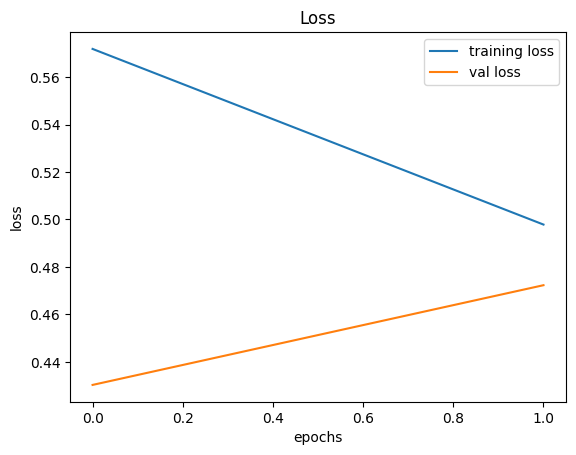

In [ ]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Classification Report

In [ ]:
print(classification_report(Y_test,y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.73      0.47      0.58       116
           3       0.00      0.00      0.00         0
           4       0.82      0.96      0.89       325

   micro avg       0.81      0.83      0.82       441
   macro avg       0.31      0.29      0.29       441
weighted avg       0.80      0.83      0.80       441
 samples avg       0.82      0.83      0.82       441



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Saving Model

In [ ]:
# Serialize model to JSON
model_json = model.to_json()
with open("custom_model.json", "w") as json_file:
    json_file.write(model_json)

# Serialize weights to HDF5
model.save_weights("custom_weight.h5")
model.save('custom_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
